In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

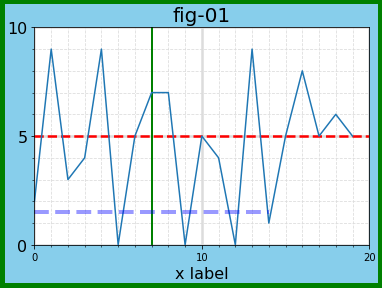

In [8]:
"""基本的なプロット
figsize     ：Figureのサイズ。横縦を(float, float)で指定。
dpi         ：整数で指定。Figureのピクセルサイズ=figsize×dpi
facecolor   ：図の背景色。Jupyterだと透過色になってたりする。
linewidth   ：図の外枠の太さ。デフォルトは0（枠なし）。
edgecolor   ：図の枠の色。linewidthを指定しないと意味ない。
subplotpars ：AxesSubplotの基準を指定する。
tight_layout：Trueにするとオブジェクトの配置が自動調整される。
"""
fig = plt.figure(figsize=(6, 4), dpi=72,
                 facecolor='skyblue', linewidth=10, edgecolor='green')
ax = fig.add_subplot(111)
ax.plot([np.random.randint(0, 10) for i in range(20)])
ax.set_title("fig-01", fontsize=20)
ax.set_xlabel("x label", fontsize=16)
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
plt.yticks(fontsize=16)

# グリッドの表示例
ax.set_xticks(np.linspace(0, 20, 3))  # 主目盛
ax.set_xticks(np.linspace(0, 20, 21), minor=True)  # 副目盛
ax.set_yticks(np.linspace(0, 10, 3))
ax.set_yticks(np.linspace(0, 10, 11), minor=True)
ax.grid(which='major', c='gainsboro', lw=2.5)
ax.grid(which='minor', c='gainsboro', ls='--', zorder=9)  # zorderの設定は折れ線参照
ax.set_axisbelow(True)  # グリッドを背面表示

# 補助線の例
ax.plot([1.5]*15, linestyle='dashed', c='b', linewidth=4., alpha=0.4)
ax.hlines(5, 0, 20, 'r', linestyles='dashed', linewidth=2.5)
ax.vlines(7, 0, 10, 'g', linestyles='solid', linewidth=2.)

# fig.savefig('1-1_a.png', facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())
plt.show()

In [620]:
"""Axesの作成
Axesが1つ ⇒ Figure.add_subplot(111)
同じ大きさのAxesを並べる ⇒ Figure.add_subplot()
いろいろな大きさのAxesを並べる ⇒ GridSpec
グラフの大きさ、位置を自由に決めたい ⇒ Figure.add_axes()
"""

'Axesの作成\nAxesが1つ ⇒ Figure.add_subplot(111)\n同じ大きさのAxesを並べる ⇒ Figure.add_subplot()\nいろいろな大きさのAxesを並べる ⇒ GridSpec\nグラフの大きさ、位置を自由に決めたい ⇒ Figure.add_axes()\n'

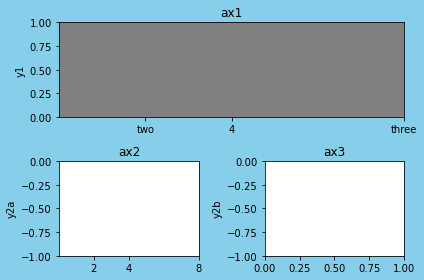

In [621]:
"""add_subplotの設定"""
fig = plt.figure(figsize=(6, 4), facecolor='skyblue', tight_layout=True)
ax1 = fig.add_subplot(211, title="ax1", fc='gray', ylabel="y1",
                      xticks=[2, 4, 8], xticklabels=["two", "4", "three"])
ax2 = fig.add_subplot(223, title="ax2", xticks=[2, 4, 8], ylim=(-1, 0), ylabel="y2a")
ax3 = fig.add_subplot(224, title="ax3", sharey=ax2, ylabel="y2b")

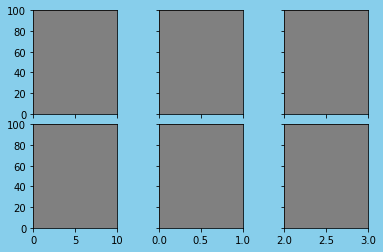

In [622]:
"""plt.subplotの設定"""
fig, axes = plt.subplots(2, 3, figsize=(6, 4), facecolor='skyblue',
                         sharex='col', sharey=True,
                         subplot_kw=dict(facecolor='gray'))
axes[0, 0].set_xlim(0, 10)  #一番左上のグラフのx軸の範囲を0～10に設定
axes[1, 2].set_xlim(2, 3)  #一番右下のグラフのx軸の範囲を2～3に設定
axes[0, 1].set_ylim(0, 100)  #上段中央のグラフのy軸の範囲を0～100に設定

# グラフ間の隙間サイズ調整
fig.subplots_adjust(wspace=0.5, hspace=0.1)

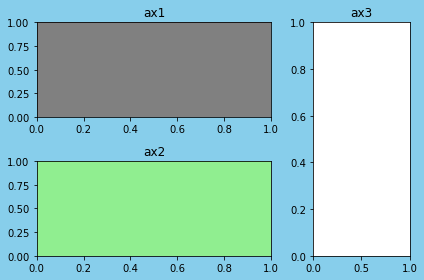

In [623]:
"""fig.GridSpecの設定

グラフの大きさ(配置)をスライスで設定できる。

"""
fig = plt.figure(figsize=(6, 4), facecolor='skyblue', tight_layout=True)
gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, 0:2], title="ax1", facecolor='gray')
ax2 = fig.add_subplot(gs[1, 0:2], title="ax2", facecolor='lightgreen')
ax3 = fig.add_subplot(gs[:, 2], title="ax3")

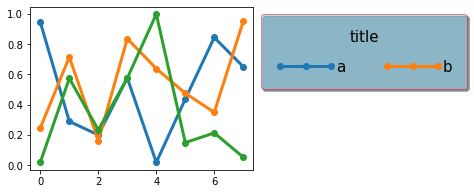

In [624]:
"""凡例の設定

locに指定した凡例の箇所がbbox_to_anchorで指定した座標になるように調整
座標はグラフの左下(0, 0)、右上(1, 1)

"""
labels = ["a", "b", "c"]
fig = plt.figure(figsize=(4, 3))
ax1 = fig.add_subplot(111)
plts = ax1.plot(np.random.rand(8, 3), marker='o', linewidth=3)
ax1.legend(handles=plts[:2],  # 凡例に乗せるデータ
           labels=labels, 
           loc='upper left',  # 凡例の位置
           bbox_to_anchor=(1, 1),  # 凡例の位置と大きさ
           shadow=True,  # 凡例ボックスの影を表示
           framealpha=0.5,  # 凡例ボックスの透明度(0~1)
           facecolor='skyblue',  # 凡例ボックスの背景色
           edgecolor='r',  # 凡例ボックスの縁の色
           title="title",  # 凡例タイトル
           title_fontsize=15, # 凡例タイトルのフォントサイズ
           ncol=2, # 凡例の列数
           fontsize=15, # 凡例のフォントサイズ
           numpoints=3,  # マーカー数(折れ線)
           scatterpoints=3,  # マーカー数(散布図)
           markerscale=1.,  # マーカーサイズ
           borderpad=1.,  # 凡例文字とボックス縁の間の余白
           labelspacing=1.,  # 凡例の行間を指定
           handlelength=4.,  # 凡例の線の長さを指定
           handletextpad=0.,  # 凡例の線と系列名の間の余白
           columnspacing=2.5,  # 凡例の列間を指定
          )

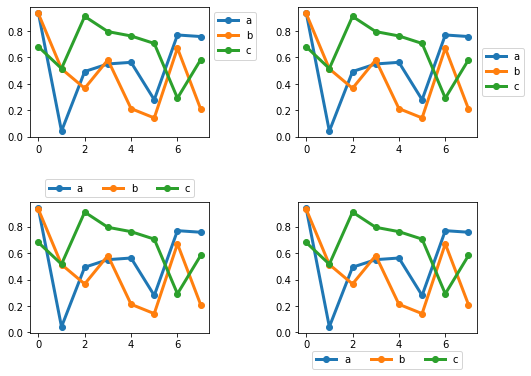

In [625]:
"""凡例の位置

locに指定した凡例の箇所がbbox_to_anchorで指定した座標になるように調整
座標はグラフの左下(0, 0)、右上(1, 1)

"""
data = np.random.rand(8, 3)
labels = ["a", "b", "c"]
fig = plt.figure(figsize=(8, 6))
#
ax1 = fig.add_subplot(221)
ax1.plot(data, marker='o', linewidth=3)
ax1.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
#
ax2 = fig.add_subplot(222)
ax2.plot(data, marker='o', linewidth=3)
ax2.legend(labels, loc='center left', bbox_to_anchor=(1., .5))
#
ax3 = fig.add_subplot(223)
ax3.plot(data, marker='o', linewidth=3)
ax3.legend(labels, loc='lower center', bbox_to_anchor=(.5, 1.), ncol=3)
#
ax4 = fig.add_subplot(224)
ax4.plot(data, marker='o', linewidth=3)
ax4.legend(labels, loc='upper center', bbox_to_anchor=(.5, -.1), ncol=3)
#
fig.subplots_adjust(wspace=0.5, hspace=0.5)

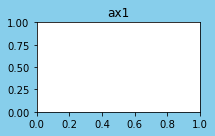

In [626]:
"""余白をつめる

plt.savefigに「bbox_inches='tight', pad_inches=0」を追加。

"""
fig = plt.figure(figsize=(3, 2), facecolor='skyblue', tight_layout=True)
ax1 = fig.add_subplot(111, title="ax1")
# plt.savefig("result.png", bbox_inches='tight', pad_inches=0)

In [627]:
# プロット用データの作成
x = np.linspace(0, 9, 20)
y1 = np.array([np.random.randint(0, 10) for i in range(20)])
y2 = np.array([np.random.randint(15, 30) for i in range(20)])
y3 = np.array([np.random.randint(20, 30) for i in range(20)])
y4 = np.array([np.random.randint(30, 50) for i in range(15)])
y5 = np.array([np.random.randint(40, 48) for i in range(15)])

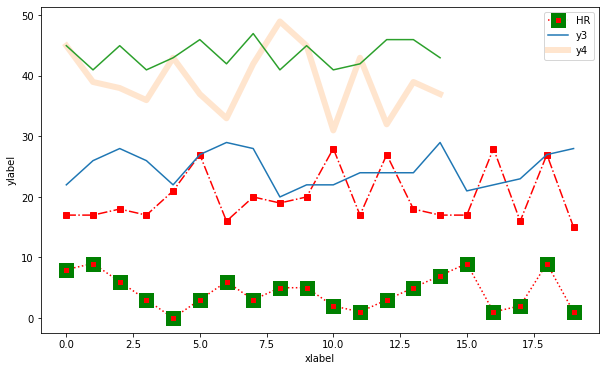

In [628]:
"""折れ線
[引数]
label           ：プロットのラベル。
color           ：折れ線の色。cでも可。
dashes          ：折れ線の実線部分と空白部分の長さをリストで指定。
linestyle       ：折れ線の線種。lsでも可。dashesが指定されていると無効。
linewidth       ：折れ線の太さ。lwでも可。
alpha           ：透明度を0～1で指定。
zorder          ：オブジェクトが重なっていた時この値が大きい方が前面に描画される。
marker          ：マーカーの形状。Noneでマーカーなし。
markersize      ：マーカーのサイズ。msでも可。
markerfacecolor ：マーカーの色。mfcでも可。
markeredgewidth ：マーカーの縁の太さ。mewでも可。
markeredgecolor ：マーカーの縁の色。mecでも可。
"""
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, xlabel="xlabel", ylabel="ylabel")
ax.plot(y1, 'rs:', label="HR", ms=10, mew=5, mec='green')
ax.plot(y2, c='r', marker='s', linestyle='-.')
ax.plot(y3, label="y3")
ax.plot(y4, label="y4", linewidth=6, alpha=0.2)
ax.plot(y5)
plt.legend()

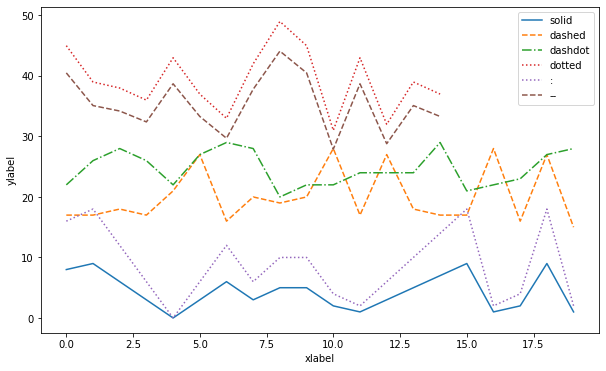

In [629]:
"""折れ線続き
[引数]
linestyle       ：折れ線の線種。lsでも可。dashesが指定されていると無効。
linewidth       ：折れ線の太さ。lwでも可。
"""
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, xlabel="xlabel", ylabel="ylabel")
ax.plot(y1, linestyle='solid', label="solid")
ax.plot(y2, linestyle='dashed', label="dashed")
ax.plot(y3, linestyle='dashdot', label="dashdot")
ax.plot(y4, linestyle='dotted', label="dotted")
ax.plot(y1*2.0, linestyle=':', label=":")
ax.plot(y4*0.9, linestyle='--', label="--")
plt.legend()

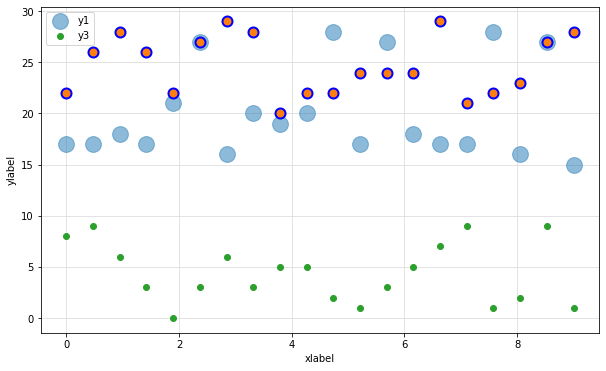

In [630]:
"""散布図
[引数]
size            ：マーカーのサイズ。s。
color           ：マーカーの色。c。
linewidth       ：縁の太さ。lw。
edgecolors      ：マーカーの縁の色。デフォルトは'face'（cと同じ色）。
alpha           ：透明度を0～1で指定。
zorder          ：表示順の設定。オブジェクトが重なっていた時この値が大きい方が前面に描画される。
"""
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, xlabel="xlabel", ylabel="ylabel")
ax.scatter(x, y2, s=250, label="y1", alpha=0.5)
ax.scatter(x, y3, s=100, linewidth=2, edgecolors='b')
ax.scatter(x, y1, label="y3")
ax.grid(c='gainsboro', zorder=9)
ax.set_axisbelow(True)
plt.legend()

[1. 3. 2. 4. 0. 3. 2. 1. 1. 3. 0. 0. 0. 0. 0. 1. 2. 6. 2. 1. 3. 2. 5. 1.
 3. 0. 2. 5. 5. 2. 0. 1. 1. 1. 0. 0. 1. 2. 1. 2. 0. 4. 3. 4. 0. 5. 3. 1.
 0. 1.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
90.0 0.0 50.0


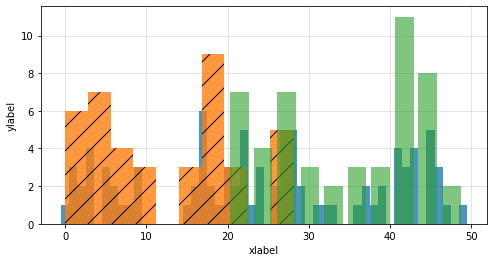

In [631]:
"""ヒストグラム
[引数]
bins        ：ビンの本数。デフォルトは10。
range       ：対象範囲を(float, float)で指定。デフォルトは(x.min(), x.max())。
density     ：True：正規化する。ヒストグラムの面積を1にする。
cumulative  ：True：グラフを累積分布にする。
rwidth      ：各棒の幅を数値または、配列で指定。
log         ：True：縦軸を対数目盛で表示。
histtype    ：グラフの種類（下記参照）。デフォルトは'bar'。
            ：'step'：塗りつぶしなしの線で出力。
            ：'stepfilled'：塗りつぶしありの線で出力。
            ：'barstacked'：積み上げヒストグラム。
stacked     ：True：積み上げヒストグラム。
align       ：ビンの横位置。デフォルトは'mid'（区間の中央）。他は'left'，'right'。
orientation ：デフォルトは'vertical'。'horizontal'にすると横棒になる。
color       ：リストで系列毎に指定可。
label       ：リストで系列毎に指定可。
facecolor   ：ビンの色。fcでも可。colorとは違いリスト不可（全系列同色）。
hatch       ：ビンの網掛け。
linewidth   ：ビンの縁の太さ。lwでも可。
edgecolor   ：ビンの縁の色。ecでも可。
alpha       ：透明度を0～1で指定。
zorder      ：オブジェクトが重なっていた時この値が大きい方が前面に描画される。
"""
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, xlabel="xlabel", ylabel="ylabel")
y_hist0 = np.hstack([y1, y2, y3, y4, y5])
y_hist1 = np.hstack([y1, y2])
y_hist2 = np.hstack([y3, y4, y5])
n0, bins0, patches0 = ax.hist(y_hist0, range=(0, 50), bins=50, rwidth=1.0, 
                              align='left', density=False, alpha=0.8)
n1, bins1, patches1 = ax.hist(y_hist1, alpha=0.8, hatch='/')
n2, bins2, patches2 = ax.hist(y_hist2, alpha=0.6, rwidth=0.8)
# 戻り値について
# ｎ:各ビンの高さの配列(小さい方から)、bins：境界の配列
print(n0)
print(bins0)
print(np.sum(n0), np.min(bins0), np.max(bins0))
ax.grid(c='gainsboro', zorder=9)
ax.set_axisbelow(True)

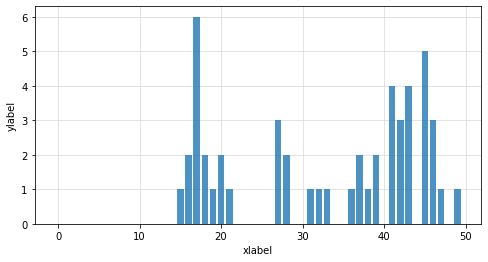

In [632]:
# ビンの調整1
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, xlabel="xlabel", ylabel="ylabel")
y_hist0 = np.hstack([y2, y4, y5])
ax.hist(y_hist0, range=(0, 50), bins=50, rwidth=0.8, align='left', density=False, alpha=0.8)
ax.grid(c='gainsboro', zorder=9)
ax.set_axisbelow(True)

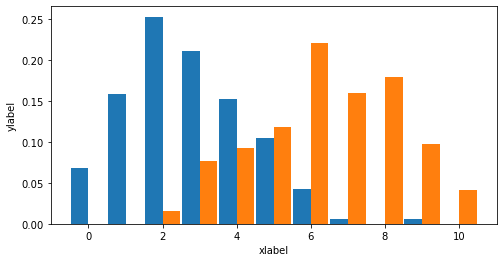

In [633]:
# ビンの調整2
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, xlabel="xlabel", ylabel="ylabel")
x = np.random.normal(3, 2, 200)  # 平均, 標準偏差, 生成数
y = np.random.normal(7, 2, 200)
n, bins, patches = plt.hist([x, y], range=(0, 11), bins=11, rwidth=0.95, align='left', density=True)

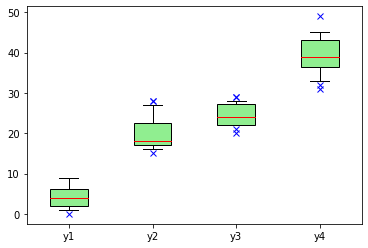

In [634]:
"""箱ひげ図
[引数]
notch       ：Trueは箱を切り目ありにする。95%信頼区間が可視化される。
sym         ：外れ値のマーカーの色と形状を文字列型で指定。{''}で非表示。
vert        ：Falseはグラフを横表示にする。
whis        ：外れ値の境界を4分位範囲(IQR)=1とした値で指定。デフォルトは1.15。
            ：[5, 95]でパーセンタイ表示。
            ：'range'で外れ値を考慮しない。
widths      ：箱の太さ。デフォルトは0.5。
labels      ：x軸のラベル(リスト指定)。
showmeans   ：Trueは平均値を表すマーカーを表示。meanline=Trueでマーカーから線表示になる。

medianprops ：中央値を表す線のスタイル。辞書型で指定。
flierprops  ：外れ値のマーカースタイル。辞書型で指定。※symを指定している場合は無効になる。
meanprops   ：平均値のマーカースタイル。辞書型で指定。
"""
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
result = ax.boxplot([y1, y2, y3, y4],
                     whis=[10, 90],
                     labels=["y1", "y2", "y3", "y4"],
                     patch_artist=True, boxprops=dict(facecolor='lightgreen'),
                     medianprops=dict(color='red'),
                     flierprops=dict(marker='x', markeredgecolor='blue'))

## 軸・目盛の設定

In [635]:
import matplotlib as mpl

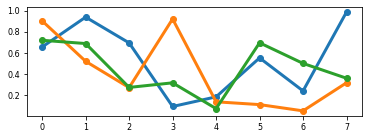

In [636]:
"""目盛あり(サイズ指定)"""
fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(111)
plts = ax.plot(np.random.rand(8, 3), marker='o', linewidth=3)
ax.tick_params(labelsize=8)

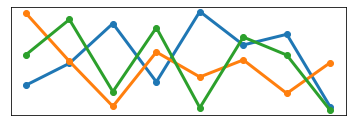

In [637]:
"""目盛なし"""
fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(111)
plts = ax.plot(np.random.rand(8, 3), marker='o', linewidth=3)
ax.xaxis.set_major_locator(mpl.ticker.NullLocator())
ax.yaxis.set_major_locator(mpl.ticker.NullLocator())

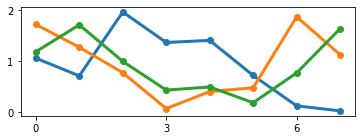

In [638]:
"""特定の値の整数倍に設定"""
fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(111)
plts = ax.plot(np.random.rand(8, 3)*2, marker='o', linewidth=3)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(3.))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator())  # デフォルトは1.0

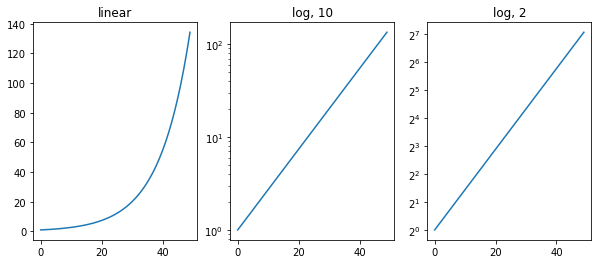

In [639]:
"""対数軸"""
y = [np.exp(i/10) for i in range(50)]
fig = plt.figure(figsize=(10, 4))
#
ax1 = fig.add_subplot(131, title="linear")
ax1.plot(y)
#
ax2 = fig.add_subplot(132, title="log, 10", yscale='log')
ax2.plot(y)
#
ax3 = fig.add_subplot(133, title="log, 2")
ax3.plot(y)
ax3.set_yscale('log', basey=2)  # 底の指定
#
plt.show()

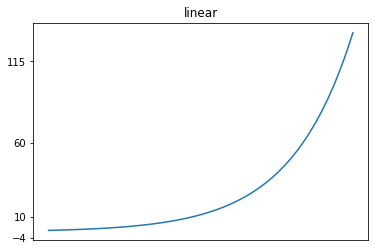

In [640]:
"""目盛の位置を自由に設定"""
y = [np.exp(i/10) for i in range(50)]
fig = plt.figure(figsize=(6, 4))
#
ax1 = fig.add_subplot(111, title='linear')
ax1.plot(y)
ax1.set_xticks([])  # x軸目盛
ax1.set_yticks([-4, 10, 60, 115])  # y軸目盛
plt.show()

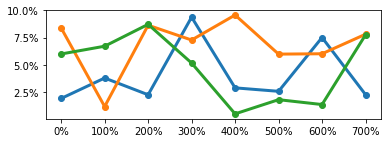

In [641]:
"""%表示"""
fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(111)
ax.plot(np.random.rand(8, 3), marker='o', linewidth=3)
ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(10))

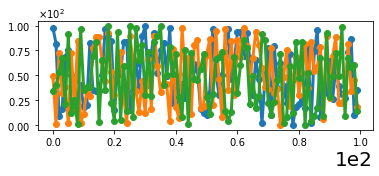

In [642]:
"""指数表記(+サイズ指定)
scilimits=(n,m)は"nからmの範囲外を指数表記にする
"""
from matplotlib.ticker import ScalarFormatter
fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(111)
ax.plot(np.random.rand(100, 3)*100, marker='o', linewidth=3)
# ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci',  axis='x', scilimits=(0, 0))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci',  axis='y', scilimits=(0, 0))
# 指数表記部分のフォントサイズ指定
ax.xaxis.offsetText.set_fontsize(20)

## その他細かい設定

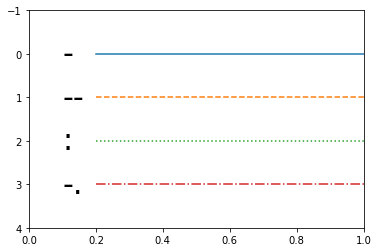

In [643]:
"""ラインスタイル"""
fig = plt.figure()
ax = fig.add_subplot(111, xlim=(0, 1), ylim=(4, -1))
ls_list = ['-', '--', ':', '-.']
for i, ls in enumerate(ls_list):
    ax.text(0.1, i, ls, size=30, va='center')
    ax.plot([0.2, 1], [i, i], ls=ls)

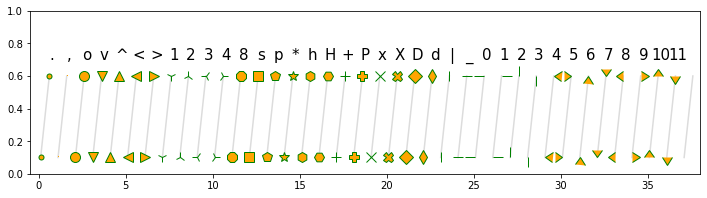

In [644]:
"""マーカースタイル"""
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(111, xlim=(-0.5, 38), ylim=(0, 1))
m_list = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's',
          'p', '*', 'h', 'H', '+', 'P', 'x', 'X', 'D', 'd', '|', '_',
          0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, '']
plot = [0.1, 0.6]
for i, m in enumerate(m_list):
    x = [i+p for p in plot]
    ax.plot(x, plot, c='gainsboro',
            marker=m, ms=10, mfc='orange', mew=1., mec='green')
    ax.text(i+0.75, 0.7, m, size=15, ha='center')
plt.show()

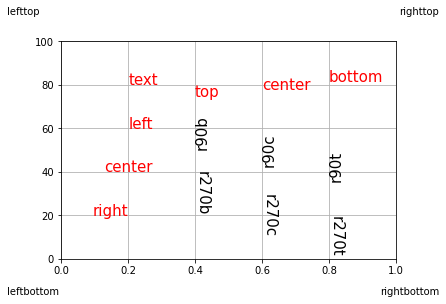

In [645]:
"""文字・注釈"""
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111, ylim=(0, 100))
ax1.grid()

# 基本
ax1.text(0.2, 80, "text", c='r', size=15)
ax1.text(0.2, 60, "left", c='r', size=15, ha='left')
ax1.text(0.2, 40, "center", c='r', size=15, ha='center')
ax1.text(0.2, 20, "right", c='r', size=15, ha='right')
ax1.text(0.4, 80, "top", c='r', size=15, va='top')
ax1.text(0.6, 80, "center", c='r', size=15, va='center')
ax1.text(0.8, 80, "bottom", c='r', size=15, va='bottom')

# 回転
ax1.text(0.4, 50, "r90b", size=15, rotation='vertical', va='bottom')
ax1.text(0.6, 50, "r90c", size=15, rotation='vertical', va='center')
ax1.text(0.8, 50, "r90t", size=15, rotation='vertical', va='top')
ax1.text(0.4, 20, "r270b", size=15, rotation=270, va='bottom')
ax1.text(0.6, 20, "r270c", size=15, rotation=270, va='center')
ax1.text(0.8, 20, "r270t", size=15, rotation=270, va='top')

# fig
fig.text(0, 0, "leftbottom")
fig.text(1, 0, "rightbottom", ha='right')
fig.text(0, 1, "lefttop", va='top')
fig.text(1, 1, "righttop", ha='right', va='top')

fig.subplots_adjust(wspace=0.0)

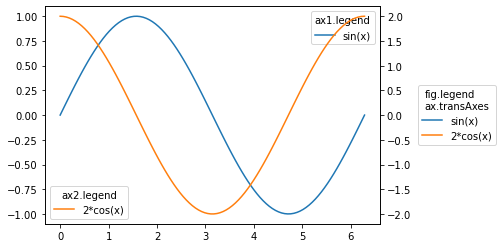

In [655]:
"""凡例の表示例"""
x = np.linspace(0, 2*np.pi, 100)
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)
ax1.plot(x, np.sin(x), label="sin(x)")
ax2 = ax1.twinx()
ax2.plot(x, 2*np.cos(x), c='C1', label="2*cos(x)")

ax1.legend(title="ax1.legend")
ax2.legend(title="ax2.legend")
fig.legend(title='fig.legend\nax.transAxes', 
           bbox_transform=ax1.transAxes,  # 設定座標をfigureからaxの座標系に変更。
           loc='center left', bbox_to_anchor=(1.1, .5),  
          )

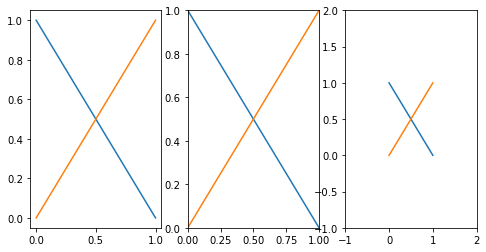

In [647]:
"""軸の最小値・最大値の設定"""
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(131)
ax1.plot([[1, 0], [0, 1]])  # デフォルト（margin=0.05）
ax2 = fig.add_subplot(132, xmargin=0, ymargin=0)
ax2.plot([[1, 0], [0, 1]])
ax3 = fig.add_subplot(133, xmargin=1, ymargin=1)
ax3.plot([[1, 0], [0, 1]])

In [595]:
"""レイアウト初期設定

plt.rcParams["調整したいパラメータ"] = (値)
あるいは
parameters = {'axes.labelsize': 25, 'axes.titlesize': 35}
plt.rcParams.update(parameters)

"""
# 図の大枠に関する設定
parameters = {'figure.figsize': [6., 4.],  # 図の縦横のサイズ([横(inch),縦(inch)])
              'figure.dpi': 150,  # dpi(dots per inch)
              'figure.autolayout': False,  # レイアウトの自動調整を利用するかどうか
              'figure.subplot.left': 0.1,  # 余白
              'figure.subplot.bottom': 0.1,  # 余白
              'figure.subplot.right': 0.1,  # 余白
              'figure.subplot.right': 0.1,  # 余白
              'figure.subplot.wspace': 0.1,  # 図が複数枚ある時の左右との余白
              'figure.subplot.hspace': 0.1,  # 図が複数枚ある時の上下との余白
             }
# フォントに関する設定
parameters = {'font.family': 'serif',  # 使用するフォント
              'font.serif': 'Times New Roman', 
              'font.size': 'serif',  # 基本となるフォントの大きさ
              'mathtext.cal': 'serif',  # TeX表記に関するフォント設定
              'mathtext.rm': 'serif',  # TeX表記に関するフォント設定
              'mathtext.it': 'serif:italic',  # TeX表記に関するフォント設定
              'mathtext.bf': 'serif:bold',  # TeX表記に関するフォント設定
              'mathtext.fontset': 'cm',  # TeX表記に関するフォント設定
             }
# 目盛に関する設定
parameters = {'xtick.direction': 'in',  # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"
              'ytick.direction': 'in',  # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"
              'xtick.top': True,  # 上部に目盛り線を描くかどうか
              'xtick.bottom': True,  # 下部に目盛り線を描くかどうか
              'ytick.left': True,  # 左部に目盛り線を描くかどうか
              'ytick.right': True,  # 右部に目盛り線を描くかどうか
              'xtick.major.size': 4.0,  # x軸主目盛り線の長さ
              'ytick.major.size': 4.0,  # y軸主目盛り線の長さ
              'xtick.major.width': 1.0,  # x軸主目盛り線の線幅
              'ytick.major.width': 1.0,  # y軸主目盛り線の線幅
              'xtick.minor.visible': False,  # x軸副目盛り線を描くかどうか
              'ytick.minor.visible': False,  # y軸副目盛り線を描くかどうか
              'xtick.minor.size': 2.0,  # x軸副目盛り線の長さ
              'ytick.minor.size': 2.0,  # y軸副目盛り線の長さ
              'xtick.minor.width': 0.6,  # x軸副目盛り線の線幅
              'ytick.minor.width': 0.6,  # y軸副目盛り線の線幅
              'xtick.labelsize': 14,  # 目盛りのフォントサイズ
              'ytick.labelsize': 14,  # 目盛りのフォントサイズ
             }
# 軸に関する設定
parameters = {'axes.labelsize': 14,  # 軸ラベルのフォントサイズ
              'axes.linewidth': 1.0,  # グラフ囲う線の太さ
              'axes.grid': True,  # グリッドを表示するかどうか
             }
# グリッドに関する設定
parameters = {'grid.color': 'black',  # グリッドの色
              'grid.linewidth': 1.0,  # グリッドの線幅
             }
# 凡例に関する設定
parameters = {'legend.loc': 'best',  # 凡例の位置、"best"は適当に配置
              'legend.frameon': True,  # 凡例を囲うかどうか
              'legend.framealpha': 1.0,  # 透過度
              'legend.facecolor': 'white',  # 背景色
              'legend.edgecolor': 'black',  # 囲いの色
              'legend.fancybox': False,  # Trueにすると囲いの四隅が丸くなる
             }

In [596]:
# # rcParamsの設定値を確認
# plt.rcParams